In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
pd.options.display.max_columns = None  # Show all columns
pd.options.display.max_rows = 500

The main goal from this notebook is to invent new features similar to what we did with `total_distance` in the main EDA. We will start by adding that feature to make sure the new features we add do not make any multicolinearity issues.

In [42]:
df = pd.read_csv("../data/split/train.csv")
df["trip_duration"] = np.log1p(df["trip_duration"])  # What we want to predict

In [43]:
# Using distance formula:
# https://www.chegg.com/homework-help/questions-and-answers/point-latitude-373198-point-longitude-121936-point-b-latitude-373185-point-b-longitude-121-q56508606

R = 6356  # radius of Earth in km

# Convert degrees to radians
lat1 = np.radians(df["pickup_latitude"])
lat2 = np.radians(df["dropoff_latitude"])
lon1 = np.radians(df["pickup_longitude"])
lon2 = np.radians(df["dropoff_longitude"])

# x and y components of distance
x = R * (lat1 - lat2)
y = R * (lon1 - lon2) * np.cos(lat2)

# Euclidean distance approximation
df["trip_distance"] = np.sqrt(x**2 + y**2)

print(df["trip_distance"])

0          2.756531
1          1.954635
2          1.401424
3          1.974001
4         20.777460
            ...    
999995     1.669307
999996     1.972451
999997     1.665997
999998     6.274394
999999     3.454112
Name: trip_distance, Length: 1000000, dtype: float64


In [44]:
def clean_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outliers

In [45]:
df["trip_distance"] = np.log1p(df["trip_distance"])
df = clean_outliers(df, "trip_distance")

In [47]:
# dropping coordinates
df.drop("dropoff_latitude", axis=1, inplace=True)
df.drop("dropoff_longitude", axis=1, inplace=True)
df.drop("pickup_latitude", axis=1, inplace=True)
df.drop("pickup_longitude", axis=1, inplace=True)

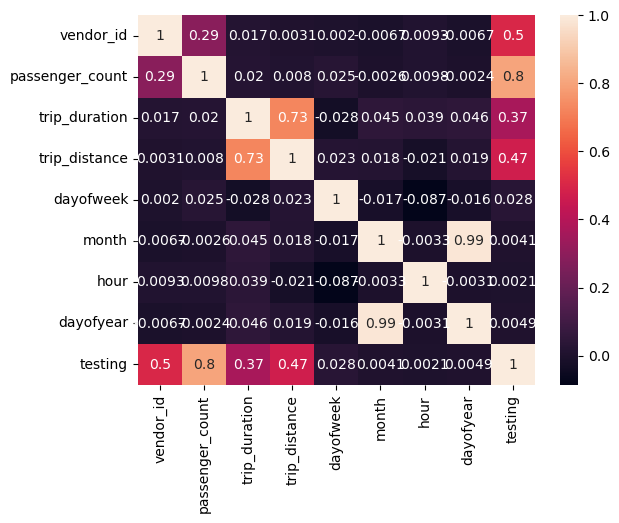

In [76]:
sns.heatmap(df.select_dtypes("number").corr(), annot=True)
plt.show()

As a starting point, the correlation between `vendor_id` and `passenger_count` seems to be interesting. It probably means that one vendor used to take more passengers then the other vendor. Let's try to create a new feature using these two features.

In [ ]:
df["testing"] = np.sqrt(df["trip_distance"] * df["passenger_count"])

In [ ]:
df.drop("testing", axis=1, inplace=True)

In [ ]:
df.loc[:, 'store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y':0})
df.loc[:, 'store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N':1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('int')

In [49]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dayofweek'] = df.pickup_datetime.dt.dayofweek
df['month'] = df.pickup_datetime.dt.month
df['hour'] = df.pickup_datetime.dt.hour
df['dayofyear'] = df.pickup_datetime.dt.dayofyear